## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 통계
- 평가일 : 22.09.08
- 성명 : 김덕현
- 점수 : 77

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [28]:
math_scores = df['mathematics']
math_mean=np.mean(math_scores)
math_median = np.median(math_scores)
math_mode = pd.Series(math_scores).mode()
math_var = np.var(math_scores)
math_std = np.std(math_scores, ddof=0)
math_range = np.max(math_scores)-np.min(math_scores)
math_IQR =np.percentile(math_scores,75) - np.percentile(math_scores,25)
print(f'평균:{math_mean}, 중앙값:{math_median}, 최빈값:{math_mode[0]}, 분산:{math_var}, 표준편차{math_std}, 범위{math_range}, IQR:{math_IQR}')

평균:78.88, 중앙값:80.0, 최빈값:77, 분산:69.38559999999995, 표준편차8.329801918413184, 범위37, IQR:8.0


In [32]:
math_mode # 최빈값 순

0    77
1    82
2    84
Name: mathematics, dtype: int64

Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [77]:
score = df.english
type(score)

pandas.core.series.Series

In [78]:
z = (score-np.mean(score))/ np.std(score)
z.head()

student number
1   -1.688430
2    1.094696
3   -0.245327
4   -1.791509
5   -0.142249
Name: english, dtype: float64

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

<function matplotlib.pyplot.show(close=None, block=None)>

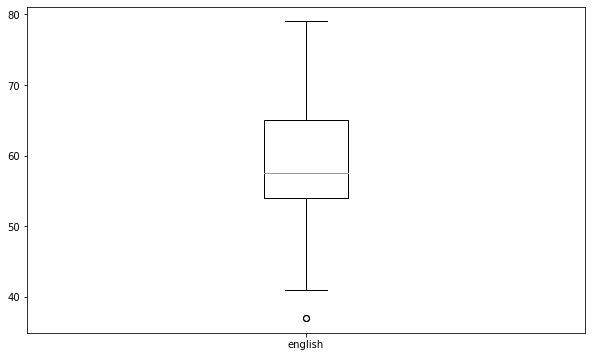

In [79]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.boxplot(score, labels=['english'])
plt.show

In [80]:
score_IQR =np.percentile(score,75) - np.percentile(score,25)
cnt =0
for i in score:
    if  i < np.percentile(score,25) - score_IQR*1.5:
        
        print(i)
    

37
37


In [85]:
#이상치 제거
score_drop = score.drop(37)

KeyError: '[37] not found in axis'

<function matplotlib.pyplot.show(close=None, block=None)>

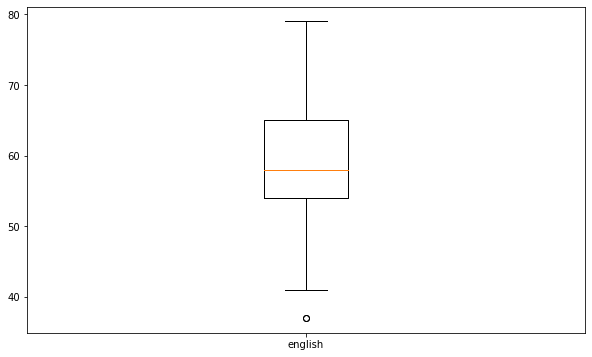

In [61]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.boxplot(score_drop, labels=['english'])
plt.show

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [93]:
import numpy as np
import pandas as pd

%precision 3

df = pd.read_csv('ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [90]:
cov_mat = np.cov(en_scores,ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [100]:
cov_mat[0,1]

62.800

In [101]:
cov_mat[1,0]

62.800

In [104]:
corr_mat = np.corrcoef(en_scores,ma_scores)
corr_mat

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [105]:
corr_mat[0,1]

0.819

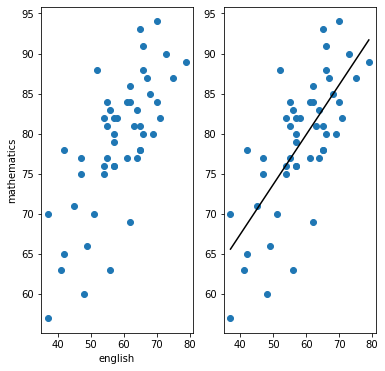

<Figure size 432x432 with 0 Axes>

In [122]:
en_scores = np.array(df['english'])
ma_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(121)
#산점도만
ax.scatter(en_scores,ma_scores)
# 회귀직선 포함
poly_fit=np.polyfit(en_scores,ma_scores,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(en_scores.min(), en_scores.max())
ys = poly_1d(xs)

fig2 = plt.figure(figsize=(6,6))
ax2 = fig.add_subplot(122)
ax2.scatter(en_scores,ma_scores, label='score')
ax2.plot(xs, ys, color='k',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()

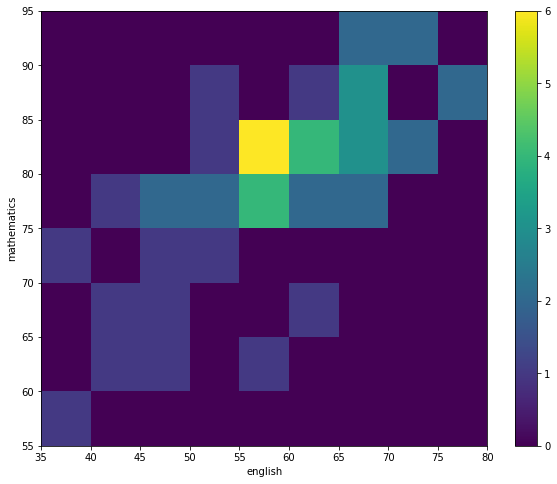

In [124]:
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.hist2d(en_scores, ma_scores,
             bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [125]:
df = pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

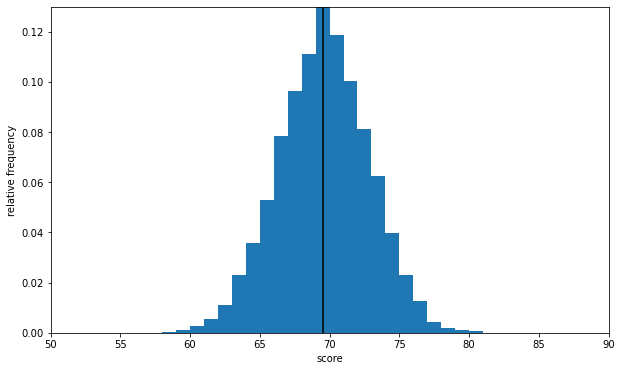

In [128]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
ax.vlines(np.mean(scores),0,1, 'k')
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

In [134]:
from scipy import stats
p=0.5
rv = stats.bernoulli(p)
print(f'기대값:{rv.mean()}')
print(f'분산:{rv.var()}')

기대값:0.5
분산:0.25


Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [136]:
n = 10
p = 0.5
rv = stats.binom(10,0.5)
print(f'기대값:{rv.mean()}')
print(f'분산:{rv.var()}')

기대값:5.0
분산:2.5


Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [137]:
lamda = 2
rv = stats.poisson(lamda)
print(f'기대값:{rv.mean()}')
print(f'분산:{rv.var()}')

기대값:2.0
분산:2.0


Q9. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 

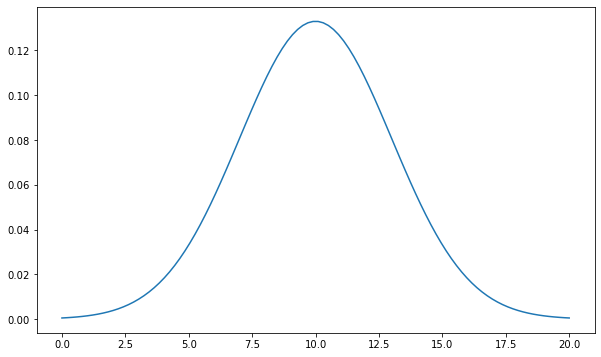

In [142]:
rv = stats.norm(10,3)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,20,100)
ax.plot(xs, rv.pdf(xs))
plt.show()

Q10. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

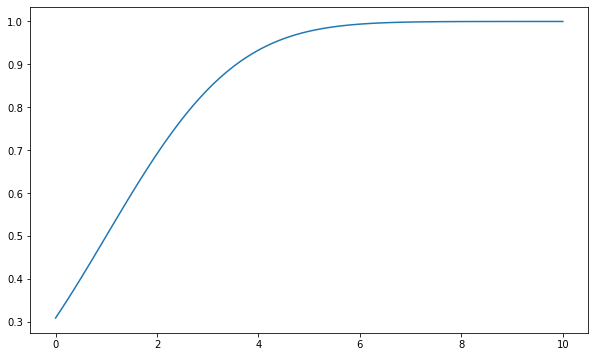

In [144]:
rv = stats.norm(1,2)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,10,100)
ax.plot(xs, rv.cdf(xs))
plt.show()

Q11. "5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [145]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [153]:
df2 = df1.copy()
df2.species 

0    A
1    A
2    A
3    B
4    B
5    B
Name: species, dtype: object

Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [154]:
import pandas as pd
shoes = pd.read_csv("5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [163]:
shoes2 = shoes1.copy()
shoes3 = pd.concat([shoes1,shoes2],axis=0)
shoes3

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [164]:
pd.pivot_table(shoes3,values='sales',index='store',columns = 'color', aggfunc='sum')

color,blue,red
store,,
osaka,26,18
tokyo,20,30


Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [232]:
titanic = pd.read_csv('titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [233]:
pd.pivot_table(titanic, values='survived',index='pclass',columns='sex',aggfunc='mean')

sex,female,male
pclass,,
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.152130


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

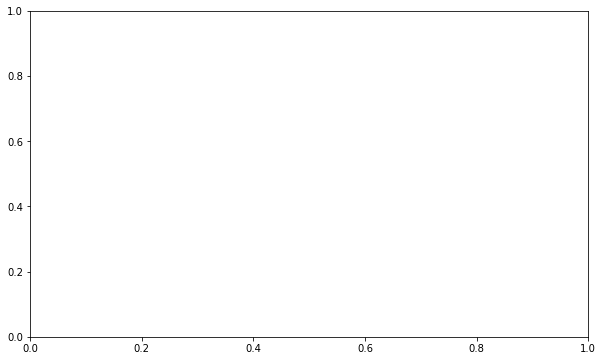

In [234]:
fig = plt.figure(figsize=(10,6))
zs = fig.add_subplot(111)

c = ax.hist2d(titanic['pclass'],titanic['sex'])
plt.show()

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [237]:
rv = stats.norm(4,0.8)
n=10000
sample_size=10
x_sample = rv.rvs((n, sample_size))
x_sample2 = np.array(x_sample)
x_sample2[:10]


array([[4.401, 3.458, 3.551, 1.994, 4.202, 4.265, 3.95 , 2.382, 3.831,
        3.793],
       [4.896, 3.801, 5.077, 4.237, 3.367, 4.835, 2.891, 3.533, 2.91 ,
        4.036],
       [3.848, 3.912, 3.526, 4.326, 3.878, 3.222, 2.751, 3.302, 2.863,
        2.556],
       [4.216, 4.748, 2.889, 4.862, 3.93 , 3.95 , 2.784, 4.136, 3.043,
        4.563],
       [4.428, 3.739, 4.132, 4.285, 3.832, 4.002, 5.072, 5.466, 5.038,
        4.384],
       [4.462, 4.015, 4.39 , 3.459, 3.727, 3.573, 4.84 , 4.014, 5.753,
        2.318],
       [4.377, 4.751, 3.673, 4.47 , 3.037, 4.481, 3.631, 4.573, 4.123,
        3.991],
       [5.056, 4.324, 3.745, 5.594, 3.459, 2.764, 4.197, 3.938, 4.69 ,
        1.957],
       [4.59 , 3.334, 4.417, 3.456, 4.014, 4.973, 4.834, 4.556, 3.24 ,
        3.612],
       [4.552, 5.162, 5.1  , 3.217, 3.181, 3.98 , 2.545, 3.05 , 4.004,
        4.673]])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

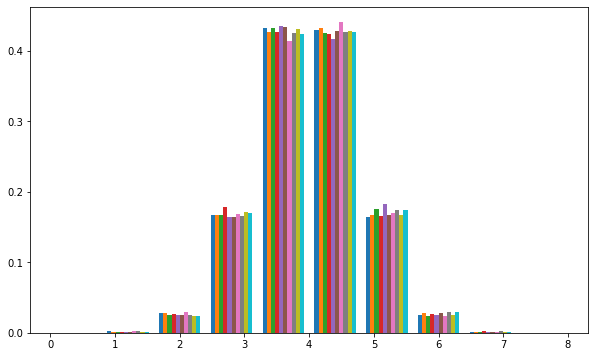

In [238]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(x_sample2, bins=10, range=(0,8), density=True)
plt.show()

Q16. 서로 독립인 X\~N(1,2), Y\~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따른다는 것을 시각화하여 출력하세요.

In [189]:
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))
sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

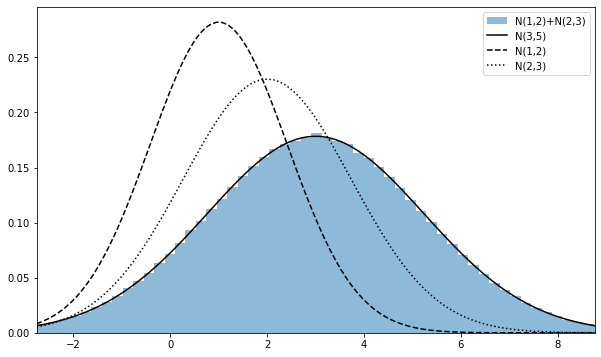

In [188]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
       alpha=0.5, label='N(1,2)+N(2,3)')
ax.plot(xs, rv.pdf(xs), label='N(3,5)', color='k')
ax.plot(xs, rv1.pdf(xs), label='N(1,2)', ls='--', color='k')
ax.plot(xs, rv2.pdf(xs), label='N(2,3)', ls=':', color='k')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

Q17. 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따른다는 것을 시각화하여 출력하세요.

C:\Users\admin\AppData\Local\Temp\ipykernel_5780\2574370035.py:14: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)


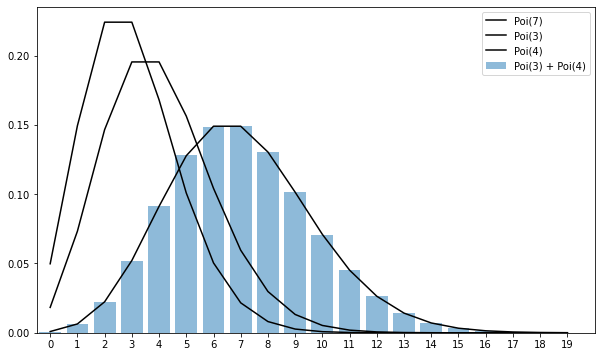

In [193]:
rv1 =stats.poisson(3)
rv2 =stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='k')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', color='k')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', color='k')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

Q18. 베르누이 분포의 합은 이항분포가 되는 성질을 시각화하여 출력하세요 

C:\Users\admin\AppData\Local\Temp\ipykernel_5780\2859423260.py:15: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)


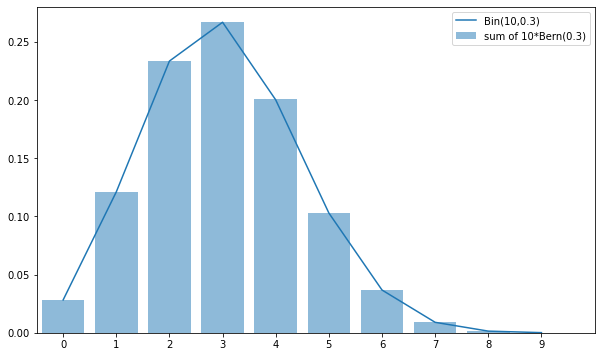

In [196]:
# p값 0.3으로 가정 n=10
p=0.3
rv= stats.bernoulli(p)
sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10,p)  #이항분포
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10,0.3)')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()


Q19. 포아송 분포의 표본분포는 근사적으로 정규분포를 따른다는 것을 시각화하고 그 핵심 근거인 중심극한정리에 대하여 설명하세요.

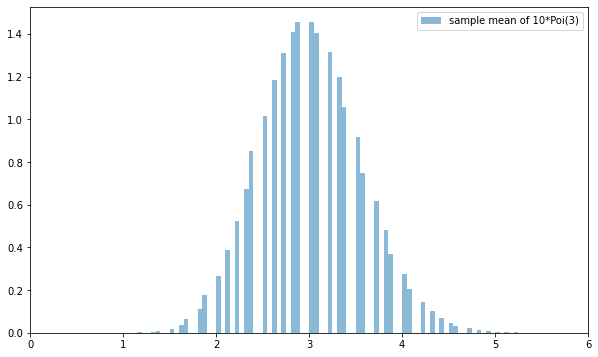

In [197]:
l = 3
rv = stats.poisson(l)

n=10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.52, label='sample mean of 10*Poi(3)')
ax.legend()
ax.set_xlim(0,6)
plt.show()

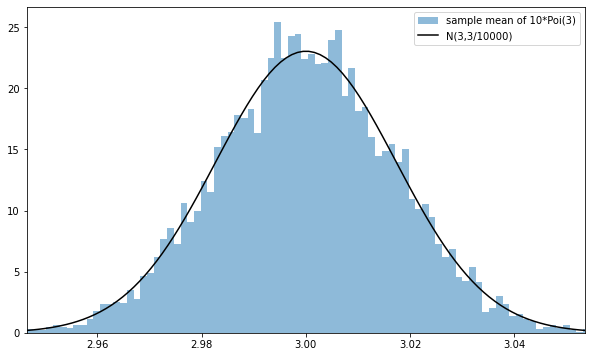

In [209]:
# 중심극한정리 어떤 분포였든, 표본평균의 분포는 정규분포에 가까워진다.
l = 3
rv = stats.poisson(l)
n=10000

sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001),100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True,
       alpha=0.5, label='sample mean of 10*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3,3/10000)', color='k')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()


Q20. 아래 df 데이터셋에서 "무게의 평균이 130kg이다."라는 귀무가설에 대한 유의성 검정을 수행하세요. 

In [169]:
df = pd.read_csv('ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [177]:
# 검정통계량
sample = np.array(df['무게'])
s_mean = np.mean(sample)
z = (s_mean -130)/ np.sqrt(9/14)
z

-1.932

In [178]:
rv = stats.norm()
rv.interval(0.95)

(-1.960, 1.960)

In [182]:
# P값
rv.cdf(z)*2

0.053

In [181]:
# 임계값
rv.isf(0.95)

-1.645

In [183]:
# p값이 유의수준보다 큰값입니다. 귀무가설 채택 그러무로 평균 130g일 확률이 높다.

In [ ]:
rv = stats.norm(130, np.sqrt(9/14))